In [12]:
# Import dependencies
%matplotlib inline
import numpy as np
np.random.seed(42) # fixing the seed
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
from scipy.signal import find_peaks, peak_widths
import pathlib
import seaborn as sns
import math

In [13]:
LODt = 1.5

def processTrace(filename, frameRate=1): 
    # If [sec] then time is already indicized into the array, use FrameRate=1
    df = pd.read_csv(filename)
    df['Time'] = df['[sec]']/frameRate
    df['Time'] = df['Time']
    df['Index'] = np.asfarray(range(0, len(df)))
    
    # Normalize to initial fluorescence
    # Define f0 as average of first ten frames
    f0 = np.mean(df['Mean'][:10])
    df['F0'] = df['Mean']/f0
    df['F0'] = np.subtract(df['F0'], df['F0'][0])
    # df['F0'] = np.subtract(df['F0'], min(df['F0']))
    return df

def combineArrays(dfs):
    x_array = []
    y_array = []
    for i in range(0, len(dfs)):
        df = dfs[i]
        x = np.asfarray(df['Time'])
        y = np.asfarray(df['F0'])
        x = x.flatten()
        y = y.flatten()
        if len(x_array) == 0:
            x_array = np.append(x_array, x)
            y_array = np.append(y_array, y)
        else:
            x_array = np.vstack((x_array, x))
            y_array = np.vstack((y_array, y)) 
    x_array = x_array.transpose()
    y_array = y_array.transpose()
    return x_array, y_array

def average_array(array): 
    means = np.mean(array, axis=1)
    stds = np.std(array, axis=1)
    return means, stds

def id_cell(df, idx): 
    id_array = []
    for i in range(0, len(df)): 
        id_array = np.append(id_array, idx)
    df['id'] = id_array
    return df

def f0array(filenames):
    df = []
    array_f0 = []
    list = []
    for i in range(0, len(filenames)): 
        df = processTrace(filenames[i])
        x = df['F0']
        list.append(x)
    array_f0 = np.asarray(list)
    return array_f0


def peakMaker2(x, y):
    # SciPy Peaks
    slices = x
    pky = y
    peaks, properties = find_peaks(pky, height=1000, threshold = 100, prominence = 70, distance=3, width=1)
    peak_count = len(peaks)
    pkFrames = slices[peaks]
    # print(pkFrames)
    
    # Others
    add_pks = []
    for i in range(2, len(slices)):
        if y[i] > y[i-1]*LODt:
            if y[i] > 0.3: 
                add_pks = np.append(add_pks, slices[i])
    print(add_pks)
    z = np.concatenate((pkFrames, add_pks))
    _, i = np.unique(z, return_index=True)
    pk = z[np.sort(i)]
    return pk, peaks
    
# Altogether
def totalProcess(filename): 
    df = []
    df = processTrace(filename, 1)

    # Define peaks
    pk1, pkFrames = peakMaker2(df['Index'], df['Mean'])
    pk = []
    pkFrames = np.asfarray(pkFrames)
    # print(pkFrames)
    
    for i in range(0, (len(pkFrames))):
        index = pkFrames[i]
        if df['F0'][index] > .05: 
            pk = np.append(pk, pk1[i])
        # else:
            # continue

    # Calculate diffs
    return pk1

def stimAdj(x_array, offset=0.25, stimTime=27.3): 
    x = np.asfarray([])
    for i in range(0, len(x_array)):
        if x_array[i] > stimTime: 
            x = np.append(x, x_array[i]+offset)
        else: 
            x = np.append(x, x_array[i])
    return x

In [14]:
# Snatch all .csv files in current directory
import os             
all_files = os.listdir()   # imagine you're one directory above test dir
# print(all_files)  # won't necessarily be sorted
import glob
filenames = glob.glob("./*.csv")
filenames = files
print(filenames)
print(len(filenames))

['./CMs_mm1_normalCond27.csv' './CMs_mm1_normalCond33.csv'
 './CMs_mm1_normalCond32.csv' './CMs_mm1_normalCond26.csv'
 './CMs_mm1_normalCond18.csv' './CMs_mm1_normalCond30.csv'
 './CMs_mm1_normalCond24.csv' './CMs_mm1_normalCond25.csv'
 './CMs_mm1_normalCond31.csv' './CMs_mm1_normalCond19.csv'
 './CMs_mm1_normalCond35.csv' './CMs_mm1_normalCond21.csv'
 './CMs_mm1_normalCond20.csv' './CMs_mm1_normalCond34.csv'
 './CMs_mm1_normalCond22.csv' './CMs_mm1_normalCond36.csv'
 './CMs_mm1_normalCond37.csv' './CMs_mm1_normalCond23.csv'
 './CMs_mm1_normalCond44.csv' './CMs_mm1_normalCond45.csv'
 './CMs_mm1_normalCond47.csv' './CMs_mm1_normalCond46.csv'
 './CMs_mm1_normalCond42.csv' './CMs_mm1_normalCond43.csv'
 './CMs_mm1_normalCond41.csv' './CMs_mm1_normalCond8.csv'
 './CMs_mm1_normalCond9.csv' './CMs_mm1_normalCond40.csv'
 './CMs_mm1_normalCond4.csv' './CMs_mm1_normalCond5.csv'
 './CMs_mm1_normalCond7.csv' './CMs_mm1_normalCond6.csv'
 './CMs_mm1_normalCond2.csv' './CMs_mm1_normalCond3.csv'
 './C

50
50


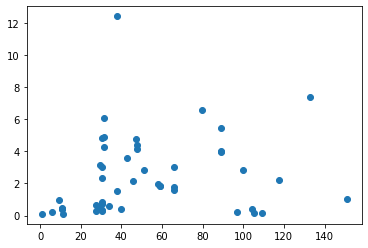

In [21]:
x_array = []
y_array = []
y2_array = []
for i in range(0, len(filenames)): 
    # print(filenames[i])
    df = processTrace(filenames[i])
    y = (max(df['F0']))
    y2 = (max(df['F0'][28:58]))
    x = np.where(df['F0']==y)
    x = x[0]
    x = x[0]
    # print(x)
    x = df['Time'][x]
    x_array = np.append(x_array, x)
    y_array = np.append(y_array, y)
    y2_array = np.append(y2_array, y2)

# plt.hist(y_array)
print(len(y_array))
print(len(x_array))
plt.scatter(x_array, y_array)

In [22]:
# Sort by max peak
ind = np.argsort(y_array)
print(ind)

[12  7 36 11 40 27 20  8  6 26 22 19 25 46 44  0 28 35 18 23 21 13 30 38
 31 24 16 42  5  1 33 39 29 49 34  3 41  9 17  4  2 48 37 15 43 14 45 47
 10 32]


In [23]:
array_f0 = f0array(filenames)

# Rearrange by max f0
array_f0 = array_f0[ind,:]

# Increase all values to be on the scale
for i in range(0, len(array_f0)):
    for j in range(0, len(array_f0[i])):
        if array_f0[i][j] < 0.01: 
            array_f0[i][j] = 0.01

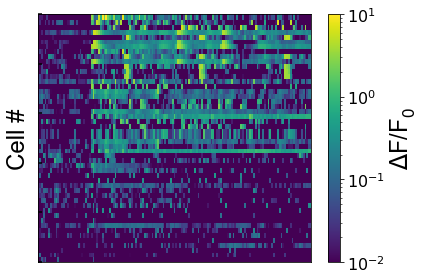

In [24]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
ax1.set_yticklabels([])

# Plot
p = plt.pcolormesh(array_f0 , norm=colors.LogNorm(vmin=0.01, vmax=10),
                   cmap='viridis', shading='auto')
# ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="24")
ax1.set_ylabel('Cell #', fontname="Arial", fontsize="24")
ax1.set_xticks([])
ax1.set_xlim(0,148)

# Colorbar
cb = fig.colorbar(p, ax=ax1)
cb.set_label('$\mathregular{\Delta}$F/F$\mathregular{_{0}}$', fontname="Arial", fontsize="24")
cb.ax.tick_params(labelsize=16)


# Save
plt.tight_layout()
plt.savefig('CMspikingwithMM1andRy.pdf', format = 'pdf')
plt.show()

In [25]:
x = []
all_responses_LOD = []
all_responses_scipy = []
for i in range(0, len(filenames)):
    x2 = totalProcess(filenames[i])
    all_responses_scipy = np.append(all_responses_scipy, x2)

all_responses_scipy = np.divide(all_responses_scipy, .99)
all_responses_scipy = np.add(all_responses_scipy, 1)

print('Traces: ', len(filenames))    
print('Peaks identified: ', len(all_responses_scipy))

[]
[ 29.  33.  74.  94. 115.]
[ 29.  76. 100.]
[ 29.  34.  38.  42.  49.  53.  57.  59.  65.  68.  78.  91.  96. 123.
 137. 140.]
[ 29.  47.  56.  65.  69.  88.  96.  99. 107. 124. 134.]
[  5.  45.  48.  54.  65.  68.  72.  78.  85. 118. 120.]
[30.]
[]
[]
[ 47.  88. 134.]
[ 29.  32.  42.  43.  45.  49.  53.  59.  65.  68.  78. 116. 123. 130.
 137.]
[]
[]
[142.]
[ 48.  88. 112. 117. 134. 147.]
[29. 76. 99.]
[ 29.  41.  58.  74.  77.  90.  94. 100. 115. 120. 126.]
[ 48.  62.  88. 134.]
[30.]
[ 72. 102.]
[]
[9.]
[39. 80.]
[29.]
[ 29.  41.  58.  74.  77.  90.  94. 100. 115. 120. 126.]
[]
[]
[]
[33. 72. 88. 91.]
[ 34.  39.  42.  50.  56.  73.  89.  92.  98. 102. 119. 125.]
[29. 33. 37. 46. 49.]
[30. 65.]
[29. 33. 35. 37. 41. 46. 51. 55. 58. 73. 80. 83. 95.]
[30.]
[30. 64. 65.]
[ 27.  42.  96. 110. 117.]
[]
[29. 33. 46. 49. 80.]
[65.]
[ 39.  41.  50.  56.  78.  82.  89.  92.  98. 102. 110. 125. 145.]
[]
[ 29.  33.  35.  42.  48.  52.  56.  68.  82.  89. 105. 117.]
[ 41.  50.  56.  78.  82.  

/Users/jacobbeckham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


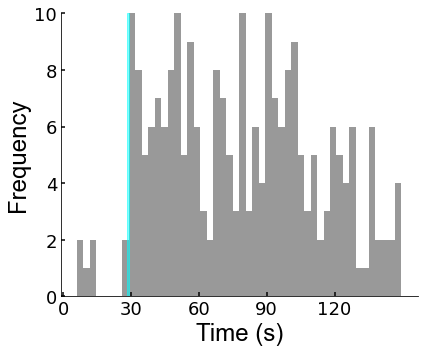

In [26]:
# Density Plot and Histogram of all arrival delays
fig, ax1 = plt.subplots(figsize=(6,5))
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='18')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

sns.distplot(all_responses_scipy, hist=True, kde=False, 
             bins=int(50), color = 'black', 
             hist_kws={'edgecolor':'None'},
             kde_kws={'linewidth': 2})

# Highlight Stim
ax1.axvspan(28, 29, alpha=0.5, color='cyan')
ax1.set_xticks([0, 30, 60, 90, 120])
ax1.set_ylim(0,10)


ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="24")
ax1.set_ylabel('Frequency', fontname="Arial", fontsize="24")

# Save
plt.tight_layout()
plt.savefig('HistogramMM1SciPy.png', dpi=300)
plt.show()

In [27]:
array = []
x2 = []

for i in range(0, len(filenames)): 
    filename = filenames[i]
    x1 = totalProcess(filename)
    for i in range(0, len(x1)): 
        if x1[i] > 29: 
            x2 = np.append(x2, x1[i])
    array = np.append(array, len(x1))
  
print(array)
print(len(array))
mean = np.mean(array)
print('Mean spikes per cell: ', mean)
stdev = np.std(array)
print('Standard dev: ', stdev)
se = stdev/math.sqrt(len(filenames))
print('Standard error: ', se)
perc = len(x2)/sum(array)*100
print('Percent of spikes after 30 s: ', perc, '%')

[]
[ 29.  33.  74.  94. 115.]
[ 29.  76. 100.]
[ 29.  34.  38.  42.  49.  53.  57.  59.  65.  68.  78.  91.  96. 123.
 137. 140.]
[ 29.  47.  56.  65.  69.  88.  96.  99. 107. 124. 134.]
[  5.  45.  48.  54.  65.  68.  72.  78.  85. 118. 120.]
[30.]
[]
[]
[ 47.  88. 134.]
[ 29.  32.  42.  43.  45.  49.  53.  59.  65.  68.  78. 116. 123. 130.
 137.]
[]
[]
[142.]
[ 48.  88. 112. 117. 134. 147.]
[29. 76. 99.]
[ 29.  41.  58.  74.  77.  90.  94. 100. 115. 120. 126.]
[ 48.  62.  88. 134.]
[30.]
[ 72. 102.]
[]
[9.]
[39. 80.]
[29.]
[ 29.  41.  58.  74.  77.  90.  94. 100. 115. 120. 126.]
[]
[]
[]
[33. 72. 88. 91.]
[ 34.  39.  42.  50.  56.  73.  89.  92.  98. 102. 119. 125.]
[29. 33. 37. 46. 49.]
[30. 65.]
[29. 33. 35. 37. 41. 46. 51. 55. 58. 73. 80. 83. 95.]
[30.]
[30. 64. 65.]
[ 27.  42.  96. 110. 117.]
[]
[29. 33. 46. 49. 80.]
[65.]
[ 39.  41.  50.  56.  78.  82.  89.  92.  98. 102. 110. 125. 145.]
[]
[ 29.  33.  35.  42.  48.  52.  56.  68.  82.  89. 105. 117.]
[ 41.  50.  56.  78.  82.  